<a href="https://colab.research.google.com/github/Akshay9715/Machine-Learning-Models/blob/main/Artificial%20Neural%20Network(ANN)/Diabetes_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Diabetes predictor

In [1]:
# code to mount google drive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing Necessary libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading DATASET

In [ ]:

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project_2/diabetes.csv')

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Checking Shape and NULL Values
print(df.shape,'\n')
print(df.isnull().sum())

(768, 9) 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


#### Getting DATASET Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Getting Statical INFO About DATASET**

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


##Checking Correlaion between Columns

In [ ]:
Correlation = df.corr()
Correlation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

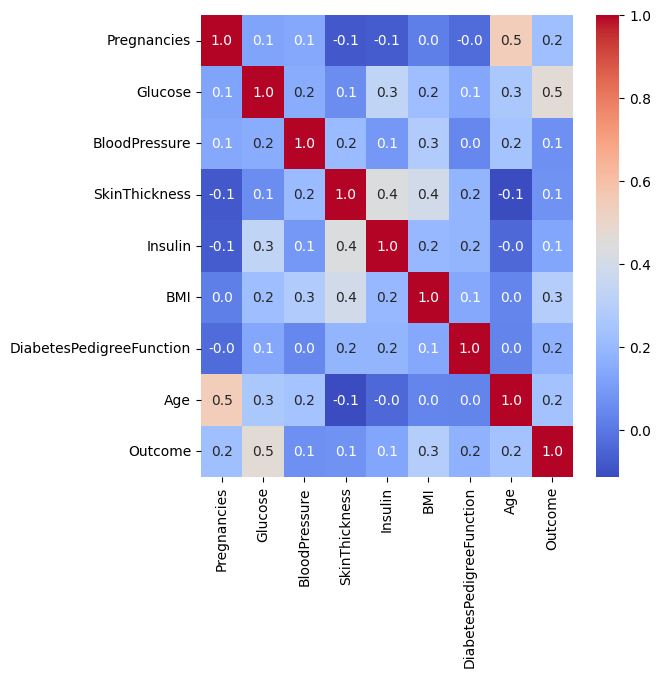

In [ ]:
# Plotting Heatmap to Understand Better
plt.figure(figsize=(6,6))
sns.heatmap(Correlation,fmt='.1f',annot=True,cmap='coolwarm')

In [ ]:
# Get correlation of 'Outcome' with other columns
outcome_correlation = df.corr()['Outcome'].sort_values(ascending=False)

# Print the correlation values
print(outcome_correlation)


Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


**Separating Columns to Proceed Further**

In [ ]:
X = df.drop('Outcome',axis=1)
Y = df['Outcome']

In [ ]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


###Spliting Data in training and testing dataset

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

## Normalizing Column Values

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


### Importing necessary libraries and models

In [ ]:
! pip install tensorflow
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

#### Preparing Model

In [ ]:
model = Sequential()
model.add(Dense(32,activation='relu',input_dim=8))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_25 (Dense)                     │ (None, 32)                  │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 833 (3.25 KB)

 Trainable params: 833 (3.25 KB)

 Non-trainable params: 0 (0.00 B)

### Compiling Model

In [ ]:
model.compile(optimizer='Adam',loss='binary_crossentropy')

### Training Model

In [ ]:
history = model.fit(x_train_scaled,y_train,epochs=40,batch_size=16,validation_split=0.2)

Epoch 1/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.6967 - val_loss: 0.6908
Epoch 2/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6273 - val_loss: 0.6315
Epoch 3/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5836 - val_loss: 0.5778
Epoch 4/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5607 - val_loss: 0.5365
Epoch 5/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5042 - val_loss: 0.5062
Epoch 6/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5205 - val_loss: 0.4806
Epoch 7/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5113 - val_loss: 0.4654
Epoch 8/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4980 - val_loss: 0.4577
Epoch 9/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4878 - val_loss: 0.4498
Epoch 10/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4722 - val_loss: 0.4477
Epoch 11/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4454 - val_loss: 0.4424
Epoch 12/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4649 - val_

## Testing Model

In [ ]:
y_pred = model.predict(x_test_scaled)
y_pred = y_pred.round()
y_pred

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


array([[0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],

###  Calculating Accuracy of the Model

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7922077922077922

In [ ]:
# JUST TESTING

ans = model.predict(x_test_scaled[50].reshape(1,-1))
print("Predicted value :- ", ans.round())
print("Actual value :- ", y_test.iloc[50])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted value :-  [[1.]]
Actual value :-  1


In [ ]:
test = scaler.transform(np.array([1,2,3,4,5,6,7,8]).reshape(1,-1))
model.predict(test).round()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.]], dtype=float32)

#**EPORTING MODEL**

In [ ]:
import pickle

In [ ]:
file_name = 'diabetes_model.pkl'
pickle.dump(model,open(file_name,'wb'))

In [ ]:
loaded_model = pickle.load(open('diabetes_model.pkl','rb'))
test = scaler.transform(np.array([1,2,3,4,5,6,7,8]).reshape(1,-1))
loaded_model.predict(test).round()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.]], dtype=float32)

#**EXPORTING SCALER**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)

# Extract parameters
mean = scaler.mean_
scale = scaler.scale_

print("mean :- ",mean)
print("scale :-",scale)

mean :-  [  3.8990228  121.93648208  69.06026059  20.25895765  82.04885993
  31.81042345   0.4754544   33.21335505]
scale :- [  3.37835113  31.80325621  19.49988601  16.17845441 120.07301344
   7.81549589   0.34034154  11.5988213 ]
